<a href="https://colab.research.google.com/github/schorscho/Ants/blob/master/gear_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from google.colab import drive

class GC:
    PROJECT_ROOT_DIR = '/content/drive/MyDrive/workspaces/GEAR'
    DATA_DIR = os.path.join(PROJECT_ROOT_DIR, 'data')
    OUTPUT_DIR = os.path.join(PROJECT_ROOT_DIR, 'output')
    TB_LOG_DIR= os.path.join(OUTPUT_DIR, 'tb-logs')
    SRC_DIR = os.path.join(PROJECT_ROOT_DIR, 'src')

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.ExcelFile(os.path.join(GC.DATA_DIR, 'GEAR_Export_20220106_093424.xlsx'))


df_interface_provider = data.parse('applicationInterfaceProviderRe')
df_interface_provider.drop(['id', 'type', 'RELATED_FACT_SHEET_TYPE', 'RELATED_FACT_SHEET_TYPE.1', 'status', 'activeFrom', 'activeUntil', 'naFields', 'description'], axis=1, inplace=True)
df_interface_provider.rename(columns = {'RELATED_FACT_SHEET':'PROVIDER_APPLICATION', 'RELATED_FACT_SHEET.1':'INTERFACE'}, inplace = True)
df_interface_provider.dropna(inplace = True)
df_interface_provider.set_index('INTERFACE', inplace = True)
df_interface_provider.drop('To', inplace = True)

df_interface_consumer = data.parse('applicationInterfaceConsumerRe')
df_interface_consumer.drop(['id', 'type', 'RELATED_FACT_SHEET_TYPE', 'RELATED_FACT_SHEET_TYPE.1', 'status', 'activeFrom', 'activeUntil', 'naFields', 'description'], axis=1, inplace=True)
df_interface_consumer.rename(columns = {'RELATED_FACT_SHEET':'CONSUMER_APPLICATION', 'RELATED_FACT_SHEET.1':'INTERFACE'}, inplace = True)
df_interface_consumer.dropna(inplace = True)
df_interface_consumer.set_index('INTERFACE', inplace = True)
df_interface_consumer.drop('To', inplace = True)

df_vertice = df_interface_provider.join(df_interface_consumer)
df_vertice.reset_index(drop=False, inplace=True)

df_vertice.info()

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   INTERFACE             3095 non-null   object
 1   PROVIDER_APPLICATION  3095 non-null   object
 2   CONSUMER_APPLICATION  3085 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


In [ ]:
graph = nx.Graph()

for s1, s2, s3 in df_vertice.values:
    graph.add_edge(s2, s3, name=s1)
    
nx.degree(graph)

DegreeView({'Optisches Archiv': 12, 'EDwin': 33, 'Vorgangs-DB (incl. AVuS)': 83, 'LZ Druck': 17, 'Provisionsbearbeitung': 29, 'Vermittlerinkasso (VMI)': 24, 'Adobe Target Premium': 1, 'Adobe Analytics': 7, 'CTV - Textverarbeitung': 44, 'Leben Mathematik proVI': 46, 'Komposit Vertragsverwaltung (SV)': 77, 'DiOrg Vermittlervereinbarungen': 49, 'ERGO Berechtigungssystem': 94, 'Code of Conduct': 60, 'ZKK Konto': 55, 'Partnerverwaltung (Paris)': 36, 'Externe Schnittstelle': 15, 'Dokumentenerstellung/Korrespondenz': 17, 'Leistung/Schaden (Casis)': 15, 'SAP-HCM Personalwirtschaft': 74, 'ZKK-Exkasso': 30, 'ERGO-Partnersystem (PDB)': 115, 'Zentrale Provision für ERGO-AO-Vertrieb (KV/LF/LV/SV)': 30, 'Workflow': 20, 'Vertriebs-/Potentialsteuerung': 7, 'ERGO Informationssystem': 47, 'Leben Verwaltung Antrag/Vertrag': 78, 'DiOrg Aufbauorganisation': 121, 'EBIS und Kunden DB KDB': 48, 'AD-DB': 50, 'Allgemeine Vertragsdaten': 112, 'ZKK Abrechnungsvereinbarungen': 37, 'Gerichtliches Mahnverfahren GMV'

In [ ]:
sorted(nx.degree(graph), key = lambda x: x[1], reverse=True)[:10]

[('DiOrg Aufbauorganisation', 121),
 ('ERGO-Partnersystem (PDB)', 115),
 ('Allgemeine Vertragsdaten', 112),
 ('ERGO Berechtigungssystem', 94),
 ('Vorgangs-DB (incl. AVuS)', 83),
 ('Leben Verwaltung Antrag/Vertrag', 78),
 ('Komposit Vertragsverwaltung (SV)', 77),
 ('SAP-HCM Personalwirtschaft', 74),
 ('Gesundheit Bestandsverwaltung', 70),
 ('ZKK Allgemein', 67)]

In [ ]:
graph.number_of_nodes(), graph.number_of_edges()

(350, 2437)

In [ ]:

len([x[1] for x in list(nx.degree(graph))])

350

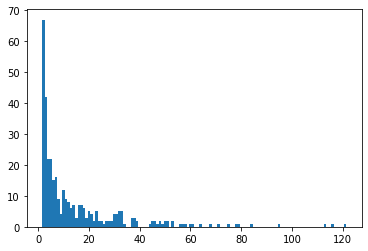

In [ ]:
plt.hist([x[1] for x in list(nx.degree(graph))], bins=120, align='right', log=False)
#ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
plt.show()

In [ ]:
sorted(nx.eigenvector_centrality(graph).items(), key=lambda x : x[1], reverse=True)[:10]

[('ERGO-Partnersystem (PDB)', 0.21066084496956605),
 ('DiOrg Aufbauorganisation', 0.21049999082126403),
 ('Allgemeine Vertragsdaten', 0.20668154683985404),
 ('ERGO Berechtigungssystem', 0.19397491573775888),
 ('Vorgangs-DB (incl. AVuS)', 0.18017457997641206),
 ('Leben Verwaltung Antrag/Vertrag', 0.17565496237353437),
 ('Komposit Vertragsverwaltung (SV)', 0.17358109122925927),
 ('ZKK Allgemein', 0.15899812328966023),
 ('Code of Conduct', 0.15361055479029043),
 ('Gesundheit Bestandsverwaltung', 0.14715792310076853)]